<h1><strong> <center>Classifying Written Digits with Pytorch</center></strong></h1>

# Importing Libraries and Configuring the Environment


This cell imports the necessary libraries for working with PyTorch and TorchVision. It also configures the environment to prevent OpenMP-related conflicts:

1. **Imports**:
   - `torch`: The main library for working with tensors and building neural networks.
   - `torch.nn`: A PyTorch submodule for defining layers and neural network architectures.
   - `torch.utils.data.DataLoader`: A tool for loading and processing datasets in batches during training.
   - `torchvision.datasets`: A module containing popular datasets like MNIST and CIFAR-10.
   - `torchvision.transforms.ToTensor`: Converts images into PyTorch tensors, normalizing pixel values to the range `[0, 1]`.

2. **Environment Configuration**:
   - `os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"`: A necessary setting to avoid conflicts with the OpenMP library on certain systems when using PyTorch.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## **Downloading and Preparing the MNIST Dataset**

In this cell, the MNIST dataset is downloaded and prepared for training and testing:

1. **Training Data**:
   - The `datasets.MNIST` function is used to download the training dataset.
   - Parameters:
     - `root="data"`: Specifies the directory where the dataset will be stored.
     - `train=True`: Downloads the training split of the MNIST dataset.
     - `download=True`: Ensures the dataset is downloaded if it is not already available locally.
     - `transform=ToTensor()`: Converts the images to PyTorch tensors and normalizes pixel values to the range `[0, 1]`.

2. **Test Data**:
   - The same process is applied for the test dataset, but with `train=False` to load the testing split.

### **About MNIST**
The MNIST dataset is a collection of 70,000 grayscale images of handwritten digits, each sized `28x28` pixels:
- **Training split**: 60,000 images.
- **Testing split**: 10,000 images.
- **Classes**: 10 digits (0 through 9).

This dataset is commonly used for benchmarking machine learning models on image classification tasks.


In [ ]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

### **Checking Unique Labels in the Dataset**

This cell extracts and displays the unique labels present in the training dataset to confirm that the dataset is properly loaded and includes all expected classes.

#### **Code Explanation**:
1. **Initialize a set**:
   - `unique_labels = set()`: A Python set is used to store unique label values from the dataset.

2. **Iterate through the dataset**:
   - `for _, label in training_data`: Loops through all items in the training dataset, ignoring the image data (`_`) and focusing on the label.

3. **Add labels to the set**:
   - `unique_labels.add(label)`: Adds each label to the set, ensuring only unique values are stored.

4. **Print the sorted labels**:
   - `print(f"Unique labels in the dataset: {sorted(unique_labels)})`: Outputs the unique labels in ascending order.

### **Purpose**:
This check ensures that all expected labels (0 through 9) are present in the dataset. The output should look like:


In [ ]:
# Unique labels of the dataset
unique_labels = set()

for _, label in training_data:  # training_data es tu dataset
    unique_labels.add(label)

print(f"Unique labels in the dataset: {sorted(unique_labels)}")

Unique labels in the dataset: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### **Checking Class Distribution in the Dataset**

This cell calculates the distribution of classes (labels) in the training dataset to ensure that the dataset is balanced.

#### **Code Explanation**:
1. **Extract Labels**:
   - `labels = [label for _, label in training_data]`: Loops through the training dataset, extracting only the labels and storing them in a list.

2. **Count the Labels**:
   - `class_counts = Counter(labels)`: Uses Python's `Counter` from the `collections` module to count the occurrences of each label.

3. **Print the Class Distribution**:
   - `print("Class distribution:", class_counts)`: Outputs the number of samples for each class in the dataset.

### **Purpose**:
This step ensures that the dataset has a balanced distribution of classes, which is critical for training a model effectively. For the MNIST dataset, the distribution should ideally look like:


In [ ]:
# Count of labels
from collections import Counter

labels = [label for _, label in training_data]
class_counts = Counter(labels)
print("Class distribution:", class_counts)

Class distribution: Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


## **Displaying the Training Dataset Information**

This cell prints the details of the `training_data` and `test_data` object to confirm that the dataset has been loaded correctly and to view its properties, such as the number of samples and applied transformations.


In [ ]:
print(training_data)
print(test_data)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


## **Checking the Dataset Type**

This cell displays the type of the `training_data` object to confirm that it is correctly loaded as a PyTorch dataset.


In [ ]:
type(training_data)

torchvision.datasets.mnist.MNIST

## **Checking the Length of the Dataset**

This cell calculates and prints the total number of samples in the training dataset.

- `len(training_data)`: Returns the number of samples in the dataset.
- The result is formatted and displayed using `print` to ensure the length matches the expected value for the dataset.




In [ ]:
dataset_length = len(training_data)

print("The length of the dataset is {0:d}".format(dataset_length))

The length of the dataset is 60000


## **Checking the Data Type of a Dataset Sample**

This cell extracts the type of a single data point from the training dataset to verify its structure.

- `type(training_data[2555])`: Checks the type of the 2555th sample in the dataset.
- The result is printed to confirm the format of the data, which is typically a tuple containing the image tensor and its corresponding label.

In [ ]:
data_type = type(training_data[2555])

print("The type of data you have extracted from FashionMinst is {0:s}".format(str(data_type)))

The type of data you have extracted from FashionMinst is <class 'tuple'>


## **Checking the Type of the First Element in a Dataset Sample**

This cell retrieves the first element of a specific sample in the dataset and checks its type.

- `training_data[2555][0]`: Accesses the first part (image) of the 2555th sample in the dataset.
- `type(first_part_tuple)`: Checks the type of this element to confirm it is as expected (typically a `torch.Tensor`).

The type is printed to verify the dataset's consistency.


In [ ]:
first_part_tuple = training_data[2555][0]

type_first_element = type(first_part_tuple)

print("The first part of the tuple is a {0:s}".format(str(type_first_element)))

The first part of the tuple is a <class 'torch.Tensor'>


## **Checking the Shape of the Image Tensor**

This cell retrieves the shape of the image tensor from a dataset sample.

- `first_part_tuple.size()`: Returns the dimensions of the tensor representing the image. For MNIST, the shape is typically `(1, 28, 28)`:
  - `1`: Single color channel (grayscale).
  - `28, 28`: Height and width of the image.

The shape is printed to confirm the dataset's image dimensions.


In [ ]:
shape = first_part_tuple.size()

print("The shape of the Torch tensor is {0:s}".format(str(shape)))

The shape of the Torch tensor is torch.Size([1, 28, 28])


## **Permuting the Image Tensor**

This cell modifies the dimensions of the image tensor using `permute` to rearrange its axes.

- `first_part_tuple.permute(1, 2, 0)`: Changes the order of the dimensions.
  - For MNIST, this rearranges `(1, 28, 28)` to `(28, 28, 1)`:
    - `1`: Channel moves to the last dimension.
    - `28, 28`: Height and width remain the same.

The new shape is printed to confirm the tensor has been correctly permuted.


In [ ]:
permuted_picture =  first_part_tuple.permute(1, 2, 0)

print ("The shape of the permuted image is now: {0:s}".format(str(permuted_picture.size())))

The shape of the permuted image is now: torch.Size([28, 28, 1])


## **Displaying the Permuted Image**

This cell visualizes the permuted image tensor using Matplotlib.

- `plt.imshow(permuted_picture, cmap='gray', vmin=0, vmax=1)`:
  - `permuted_picture`: The tensor representing the image.
  - `cmap='gray'`: Ensures the image is displayed in grayscale.
  - `vmin=0, vmax=1`: Scales pixel intensity values to the range `[0, 1]`.

This visualization confirms that the image data has been correctly processed.


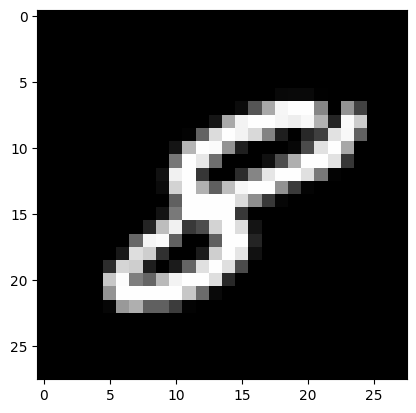

In [ ]:
plt.imshow(permuted_picture,cmap='gray', vmin=0, vmax=1)

## **Extracting the Label from a Dataset Sample**

This cell retrieves the second value of a specific sample in the dataset, which represents the label.

- `training_data[2555][1]`: Accesses the label of the 2555th sample.
- The value is printed as an integer to confirm that it corresponds to the expected class label for the MNIST dataset.


In [ ]:
second_value =  training_data[2555][1]

print("The second value of the tuple place in the 2555th position is {0:d}".format(second_value))

The second value of the tuple place in the 2555th position is 8


## **Displaying a Specific Image and its Label**

This cell visualizes a specific image from the dataset and prints its corresponding label.

- `pic = 32527`: Specifies the index of the sample to be displayed.
- **Label Mapping**:
  - `label_dict`: Maps numeric labels (0–9) to their string representations.
- **Image Tensor**:
  - `training_data[pic][0]`: Retrieves the image tensor at index `pic`.
  - `picture.permute(1, 2, 0)`: Rearranges the dimensions for visualization.
- **Visualization**:
  - `plt.imshow(permuted_picture, cmap='gray', vmin=0, vmax=1)`: Displays the image in grayscale with pixel intensity scaled between 0 and 1.
- **Label Display**:
  - `label_dict[training_data[pic][1]]`: Looks up the label for the selected image and prints it alongside its index.

This ensures that the image and its label are correctly aligned.
*texto en cursiva*

The picture in the position number 32527 is a 7


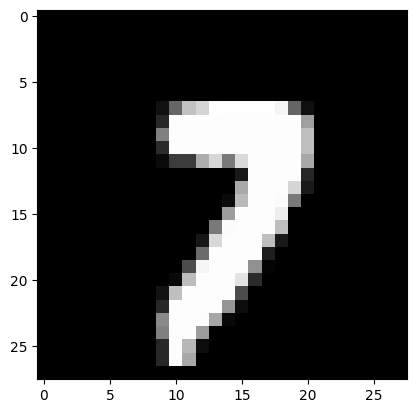

In [ ]:
pic = 32527

label_dict = {
    0 : '0',
    1 : '1',
    2 : '2',
    3 : '3',
    4 : '4',
    5 : '5',
    6 : '6',
    7 : '7',
    8 : '8',
    9 : '9'
}


picture = training_data[pic][0]
permuted_picture = picture.permute(1, 2, 0)
plt.imshow(permuted_picture,cmap='gray',vmin=0,vmax=1)

print("The picture in the position number {0:d} is a {1:s}".format(pic,label_dict[training_data[pic][1]]))

# Structuring datasets

## Creating Data Loaders and Inspecting Batches


This cell sets up data loaders for the training and testing datasets, allowing the data to be processed in batches of 64 samples during training and evaluation.

- `train_dataloader` and `test_dataloader`: Load batches of images and labels from the respective datasets.
- The `for` loop retrieves one batch from the test data and prints:
  - The shape of `X` (images), confirming the batch size, channels, height, and width.
  - The shape and data type of `y` (labels), ensuring they are correctly formatted.

In [ ]:
batch_size = 64

# Create data loaders
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


# Enabling GPU hardware

### **Identifying the Training Device**

This cell determines the device to be used for training the model (CPU, GPU, or Apple Metal Performance Shaders).

- Checks if a CUDA-compatible GPU is available (`torch.cuda.is_available()`).
- Falls back to MPS (for Apple devices with Metal support) if no GPU is found.
- Defaults to CPU if neither GPU nor MPS is available.
- Prints the identified device for confirmation.


In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("I have found {0:s} device".format(device))

I have found cpu device


### **Checking GPU Availability**

This cell verifies if a CUDA-compatible GPU is available for training.

- If a GPU is detected (`torch.cuda.is_available()`), it:
  - Prints the name of the GPU using `torch.cuda.get_device_name(0)`.
  - Confirms that the model can leverage GPU acceleration for faster computation.

If no GPU is available, the program will use the device selected in the previous cell (CPU or MPS).


In [ ]:
if torch.cuda.is_available():
    print("There is a GPU available with the name {0:s}".format(torch.cuda.get_device_name(0)))
    torch.cuda.get_device_name(0)

# Creating the Machine Linear Learning model

### Defining the Neural Network Model

This cell defines the architecture of a fully connected neural network and initializes it on the selected device (CPU or GPU).

#### **Model Architecture**:
1. **Flattening Layer**:
   - Converts the 2D image tensor `(1, 28, 28)` into a 1D vector `(1 * 28 * 28)` for input to fully connected layers.
   
2. **Fully Connected Layers**:
   - `Linear1`: Input layer, maps the 784 features to 512 neurons.
   - `Linear2` and `Linear3`: Hidden layers with 512 and 1024 neurons respectively.
   - `Linear4`: Output layer, maps 1024 neurons to 10 classes (digits 0–9).

3. **Activation Function**:
   - Applies ReLU activation (`F.relu`) after each layer to introduce non-linearity.

4. **Output**:
   - The final layer's output corresponds to the logits for each of the 10 classes.

#### **Purpose**:
- Defines a custom model for training on the MNIST dataset.
- Prints the model structure for verification.


In [ ]:
# Define model
import torch.nn.functional as F

class LinearNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(1*28*28,512)
        self.Linear2 = nn.Linear(512,512)
        self.Linear3 = nn.Linear(512,1024)
        self.Linear4 = nn.Linear(1024,10)

    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x))
        x = F.relu(self.Linear3(x))
        output = self.Linear4(x)
        return output


model = LinearNeuralNetwork().to(device)

### Your code ends here

print(model)

LinearNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (Linear1): Linear(in_features=784, out_features=512, bias=True)
  (Linear2): Linear(in_features=512, out_features=512, bias=True)
  (Linear3): Linear(in_features=512, out_features=1024, bias=True)
  (Linear4): Linear(in_features=1024, out_features=10, bias=True)
)


### **Defining the Loss Function**

This cell initializes the loss function used to evaluate the model's performance during training.

- **Loss Function**:
  - `nn.CrossEntropyLoss()`: A common loss function for classification tasks.
  - Combines `LogSoftmax` and `Negative Log-Likelihood Loss` to calculate the difference between predicted logits and true labels.

### **Purpose**:
This loss function will guide the optimization process by penalizing incorrect predictions and encouraging the model to improve its accuracy.


In [ ]:
loss_fn = nn.CrossEntropyLoss()

### **Defining the Optimizer**

This cell initializes the optimizer used to update the model's parameters during training.

- **Optimizer**:
  - `torch.optim.SGD`: Implements Stochastic Gradient Descent, a widely used optimization algorithm.
  - `model.parameters()`: Specifies the parameters of the defined model to be updated.
  - `lr=1e-3`: Sets the learning rate, which controls the step size for parameter updates.

#### **Purpose**:
The optimizer adjusts the model's weights based on the gradients computed during backpropagation, improving its performance over successive iterations.


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### **Training Function**

This cell defines the `train` function, which trains the model over one epoch using the provided data loader, loss function, and optimizer.

#### **Steps in the Training Loop**:
1. **Set Model to Training Mode**:
   - `model.train()`: Ensures the model behaves appropriately during training (e.g., applies dropout if defined).

2. **Iterate Over Batches**:
   - Loops through the batches of images (`X`) and labels (`y`) in the `dataloader`.

3. **Forward Pass**:
   - `predicted = model(X)`: Computes the predictions for the input batch.
   - `loss = loss_fn(predicted, y)`: Calculates the loss between the predictions and the true labels.

4. **Backward Pass**:
   - `optimizer.zero_grad()`: Resets gradients from the previous step.
   - `loss.backward()`: Computes the gradients for the model's parameters.

5. **Optimization**:
   - `optimizer.step()`: Updates the model's parameters using the computed gradients.

6. **Log Progress**:
   - Prints the loss every 100 batches to monitor training progress.

#### **Purpose**:
The function trains the model for one epoch, optimizing its parameters to minimize the loss and improve prediction accuracy.


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        predicted = model(X)
        loss = loss_fn(predicted, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Optimization
        optimizer.step()

        # printing the loss every 100 epoc
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print("Loss with batch nº {0:d}: {1:.6f}".format(current,loss))

### **Inspecting Batches from the DataLoader**

This cell iterates through the training data loader to print the size of the image (`X`) and label (`y`) tensors for each batch.

#### **Steps**:
1. **Enumerate Batches**:
   - Loops through batches of images (`X`) and labels (`y`) from the `train_dataloader`.
   - `batch`: The current batch index.

2. **Print Tensor Shapes**:
   - `X.size()`: Prints the shape of the image tensor (batch size, channels, height, width).
   - `y.size()`: Prints the shape of the label tensor (batch size).

#### **Purpose**:
- Ensures the data loader is correctly batching the dataset.
- Confirms that the tensors have the expected shapes before passing them to the model.


In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
    print("X {0:d}: {1:s}".format(batch,str(X.size())))
    print("y {0:d}: {1:s}".format(batch,str(y.size())))

X 0: torch.Size([64, 1, 28, 28])
y 0: torch.Size([64])
X 1: torch.Size([64, 1, 28, 28])
y 1: torch.Size([64])
X 2: torch.Size([64, 1, 28, 28])
y 2: torch.Size([64])
X 3: torch.Size([64, 1, 28, 28])
y 3: torch.Size([64])
X 4: torch.Size([64, 1, 28, 28])
y 4: torch.Size([64])
X 5: torch.Size([64, 1, 28, 28])
y 5: torch.Size([64])
X 6: torch.Size([64, 1, 28, 28])
y 6: torch.Size([64])
X 7: torch.Size([64, 1, 28, 28])
y 7: torch.Size([64])
X 8: torch.Size([64, 1, 28, 28])
y 8: torch.Size([64])
X 9: torch.Size([64, 1, 28, 28])
y 9: torch.Size([64])
X 10: torch.Size([64, 1, 28, 28])
y 10: torch.Size([64])
X 11: torch.Size([64, 1, 28, 28])
y 11: torch.Size([64])
X 12: torch.Size([64, 1, 28, 28])
y 12: torch.Size([64])
X 13: torch.Size([64, 1, 28, 28])
y 13: torch.Size([64])
X 14: torch.Size([64, 1, 28, 28])
y 14: torch.Size([64])
X 15: torch.Size([64, 1, 28, 28])
y 15: torch.Size([64])
X 16: torch.Size([64, 1, 28, 28])
y 16: torch.Size([64])
X 17: torch.Size([64, 1, 28, 28])
y 17: torch.Size(

### **Checking the Size of the Test Dataset**

This cell calculates and prints the total number of samples in the test dataset.

#### **Steps**:
1. **Calculate Dataset Length**:
   - `len(test_data)`: Returns the total number of samples in the test dataset.

2. **Print the Length**:
   - Displays the number of test samples in a formatted message.

#### **Purpose**:
- Confirms the size of the test dataset, which for MNIST should contain 10,000 samples.


In [ ]:
dataset_len = len(test_data)

print("The number of samples included in the test dataset is: {0:d}".format(dataset_len))

The number of samples included in the test dataset is: 10000


### **Testing Function**

This cell defines the `test` function, which evaluates the model's performance on the test dataset.

#### **Steps**:
1. **Set Model to Evaluation Mode**:
   - `model.eval()`: Ensures the model behaves appropriately during evaluation (e.g., disables dropout).

2. **Initialize Metrics**:
   - `test_loss`: Tracks the cumulative loss over all batches.
   - `correct`: Counts the number of correct predictions.

3. **Iterate Over Batches**:
   - Loops through the test data loader to compute predictions (`pred`) for the test images (`X`) and compare them with the true labels (`y`).

4. **Compute Metrics**:
   - `test_loss`: Accumulates the batch loss calculated using the loss function.
   - `correct`: Increments for each correct prediction (`pred.argmax(1) == y`).

5. **Calculate Averages**:
   - `avg_loss`: Average loss over all batches.
   - `accuracy`: Percentage of correct predictions.

6. **Print Results**:
   - Displays the test accuracy and average loss for the entire dataset.

#### **Purpose**:
- Evaluates the model's generalization performance on unseen data.
- Provides metrics to monitor accuracy and loss during testing.


In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = test_loss / num_batches

    accuracy = (correct / size) * 100

    print("Test Error: \n Accuracy: {0:.2f} %, Average loss: {1:.6f}".format(accuracy,avg_loss))

## **Training the Model over Multiple Epochs**

This cell trains the model for a specified number of epochs and evaluates its performance after each epoch.

### **Steps**:
1. **Define Number of Epochs**:
   - `epochs = 5`: Specifies the number of complete passes through the training dataset.

2. **Iterate Through Epochs**:
   - For each epoch:
     - `train()`: Trains the model on the training dataset.
     - `test()`: Evaluates the model's performance on the test dataset.

3. **Log Progress**:
   - Prints the epoch number and separator for clarity.
   - Displays training and testing metrics during each epoch.

4. **Completion Message**:
   - Prints a confirmation message when training is finished.

### **Purpose**:
- Trains the model iteratively to improve its performance.
- Monitors accuracy and loss after each epoch to ensure the model is learning effectively.


In [ ]:
epochs = 5
for t in range(epochs):
    print(f"\nEpoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("\nTraining done!")


Epoch 1
-------------------------------
Loss with batch nº 64: 2.303050
Loss with batch nº 6464: 2.301230
Loss with batch nº 12864: 2.297953
Loss with batch nº 19264: 2.294110
Loss with batch nº 25664: 2.299089
Loss with batch nº 32064: 2.301055
Loss with batch nº 38464: 2.293699
Loss with batch nº 44864: 2.297112
Loss with batch nº 51264: 2.293526
Loss with batch nº 57664: 2.287594
Test Error: 
 Accuracy: 17.70 %, Average loss: 2.289909

Epoch 2
-------------------------------
Loss with batch nº 64: 2.290922
Loss with batch nº 6464: 2.289789
Loss with batch nº 12864: 2.288213
Loss with batch nº 19264: 2.280548
Loss with batch nº 25664: 2.286929
Loss with batch nº 32064: 2.290076
Loss with batch nº 38464: 2.279104
Loss with batch nº 44864: 2.288334
Loss with batch nº 51264: 2.280853
Loss with batch nº 57664: 2.272445
Test Error: 
 Accuracy: 40.14 %, Average loss: 2.276003

Epoch 3
-------------------------------
Loss with batch nº 64: 2.276611
Loss with batch nº 6464: 2.275876
Loss wi

### Saving the Pytorch model

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Loading a saved Pytorch model


In [ ]:
model = LinearNeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<ipython-input-266-37a8ac0df97e>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model.pth"))


<All keys matched successfully>

# Predicting Digit


## **Digit Prediction Function**

This function predicts the label of a given digit sample using the trained model.

### **Function Details**:
1. **Input Parameters**:
   - `digit`: A tuple containing:
     - `digit[0]`: The image tensor representing the digit.
     - `digit[1]`: The true label of the digit.
   - `model`: The trained neural network used for prediction.

2. **Class Mapping**:
   - `classes`: A list of string representations for the 10 digit classes (`"0"` to `"9"`).

3. **Model Evaluation**:
   - `model.eval()`: Puts the model in evaluation mode, disabling training-specific features like dropout.
   - `torch.no_grad()`: Ensures no gradients are calculated, reducing memory usage during prediction.

4. **Prediction**:
   - `pred = model(x)`: Passes the input image tensor through the model to compute logits.
   - `pred.argmax(0)`: Retrieves the index of the class with the highest logit value (predicted class).
   - `classes[pred[0].argmax(0)]`: Maps the predicted index to its corresponding digit.

5. **Output**:
   - `predicted`: The predicted class as a string.
   - `actual`: The actual class as a string, derived from `classes[y]`.

### **Purpose**:
This function allows you to evaluate the model's prediction for a single sample, comparing the predicted and actual labels to check the model's accuracy for individual cases.


In [ ]:
def digit_predictor(digit,model):
    classes = [
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9"
        ]
    x, y = digit[0], digit[1]
    model.eval()
    with torch.no_grad():
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        return predicted,actual

## **Testing the Prediction Function**

This cell evaluates the `digit_predictor` function by passing a sample from the test dataset and printing the predicted and actual labels.

### **Steps**:
1. **Select a Test Sample**:
   - `digit = test_data[69]`: Retrieves the 69th sample from the test dataset. The sample includes:
     - `digit[0]`: Image tensor of the digit.
     - `digit[1]`: True label of the digit.

2. **Make a Prediction**:
   - `predicted, actual = digit_predictor(digit, model)`: Calls the `digit_predictor` function to:
     - Predict the digit class using the trained `model`.
     - Retrieve both the predicted and actual class labels.

3. **Print Results**:
   - `print("Predicted: {0:s}, Actual: {1:s}".format(predicted, actual))`: Displays the predicted and actual labels for comparison.

### **Purpose**:
- Verifies that the prediction function works correctly by comparing the model's output with the ground truth for a specific test sample.


In [ ]:
digit = test_data[47]

predicted,actual = digit_predictor(digit,model)

print("Predicted: {0:s}, Actual: {1:s}".format(predicted,actual))

Predicted: 2, Actual: 2


## **Predicting a Digit from an External Image**



This function predicts the digit from an external image file using the trained model.

### **Steps**:
1. **Input Parameters**:
   - `url`: Path to the external image file.
   - `model`: The trained neural network.

2. **Image Preprocessing**:
   - Opens the image file and converts it to grayscale using `Image.open(url).convert('L')`.
   - Resizes the image to `28x28` pixels, matching the input size expected by the MNIST model.
   - Normalizes the pixel values to the range `[0, 1]` by dividing by `255.0`.

3. **Tensor Conversion**:
   - Reshapes the image to the required input format `(1, 1, 28, 28)` (batch size, channels, height, width).
   - Converts the normalized image into a PyTorch tensor (`torch.from_numpy(image)`).

4. **Move to Device**:
   - Transfers the tensor to the same device (CPU or GPU) where the model resides.

5. **Model Prediction**:
   - Sets the model to evaluation mode (`model.eval()`).
   - Uses `torch.no_grad()` to disable gradient computation for efficient inference.
   - Computes logits for the image tensor (`pred = model(torch_image)`).
   - Extracts the class with the highest logit using `pred.argmax(1).item()`.

6. **Map to Class**:
   - Maps the predicted class index to its corresponding digit using the `classes` list.

7. **Return**:
   - `predicted`: The predicted digit as a string.
   - `image`: The normalized and processed image for visualization or debugging.

### **Purpose**:
This function enables the model to make predictions on external images by preprocessing them to match the MNIST format and passing them through the trained network.


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch

def digit_predict_from_image(url, model):
    classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

    # Abrir la imagen, convertir a escala de grises y redimensionar
    img = Image.open(url).convert('L')
    img_resized = img.resize((28, 28))

    # Normalizar la imagen y convertir a numpy array
    image = np.array(img_resized) / 255.0  # Escala [0, 1]

    # Añadir una dimensión para batch y canales
    image = image.reshape(1, 1, 28, 28)  # (1, 1, 28, 28)

    # Convertir a tensor
    torch_image = torch.from_numpy(image).float()

    # Mover la imagen al dispositivo correcto
    torch_image = torch_image.to(next(model.parameters()).device)

    # Predicción
    model.eval()
    with torch.no_grad():
        pred = model(torch_image)

    # Clase predicha
    predicted = classes[pred.argmax(1).item()]

    return predicted, image


## **Predicting and Displaying an External Image**

This cell uses the `digit_predict_from_image` function to predict the digit in an external image and visualize the processed input.

### **Steps**:
1. **Prediction**:
   - `digit_predict_from_image('/content/7.jpg', model)`:
     - Processes the image located at `/content/7.jpg`.
     - Predicts the digit using the trained `model`.
     - Returns the predicted digit (`outfit_prediction`) and the normalized image array (`image`).

2. **Print the Prediction**:
   - Displays the predicted digit in a formatted message:
     ```
     The machine has predicted that your picture is a {predicted_digit}.
     ```

3. **Visualize the Processed Image**:
   - Reshapes the processed `image` back to `(28, 28)` for visualization.
   - Uses `plt.imshow` to display the image in grayscale with pixel intensities normalized between 0 and 1.

### **Purpose**:
- Tests the trained model on an external image and visualizes the preprocessed input to ensure it aligns with the MNIST dataset's format.


The machine has predicted that your picture is a 0.


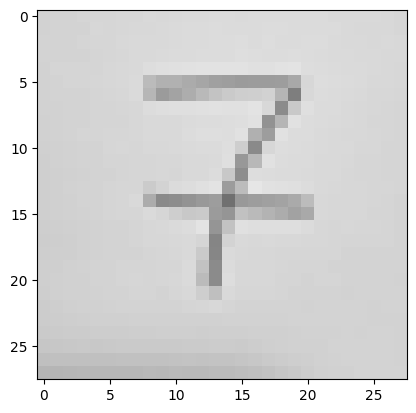

In [ ]:
outfit_prediction, image = digit_predict_from_image('/content/7.jpg', model)

# Mostrar la predicción
print('The machine has predicted that your picture is a {0:s}.'.format(outfit_prediction))
plt.imshow(image.reshape(28,28),cmap='gray',vmin=0,vmax=1)

# Improving the Machine Linear Learning model

This class defines an enhanced fully connected neural network with regularization and normalization techniques to improve its performance and generalization.

### **Architecture Overview**:
1. **Input Layer**:
   - `self.flatten`: Flattens the input image tensor `(1, 28, 28)` into a 1D vector `(1 * 28 * 28)`.

2. **Hidden Layers**:
   - **First Hidden Layer**:
     - `Linear1`: Fully connected layer mapping 784 features to 1024 neurons.
     - `BatchNorm1d`: Normalizes the output of the layer to stabilize training.
     - `ReLU`: Activation function introducing non-linearity.
     - `Dropout`: Randomly drops 50% of the neurons during training to reduce overfitting.
   - **Second Hidden Layer**:
     - `Linear2`: Maps 1024 neurons to 512.
     - `BatchNorm1d`, `ReLU`, `Dropout`: Same as the first layer.
   - **Third Hidden Layer**:
     - `Linear3`: Maps 512 neurons to 256.
     - `BatchNorm1d`, `ReLU`, `Dropout`: Same as the previous layers.

3. **Output Layer**:
   - `Linear4`: Maps 256 neurons to 10 output classes (digits 0–9).
   - No activation function is applied here because `CrossEntropyLoss` expects raw logits.

### **Forward Pass**:
1. **Flatten**: Converts the input image tensor to a 1D vector.
2. **Hidden Layers**:
   - Each layer applies a sequence of linear transformation, batch normalization, ReLU activation, and dropout.
3. **Output Layer**:
   - The final layer produces logits for the 10 output classes.

### **Key Features**:
- **Batch Normalization (`BatchNorm1d`)**:
  - Normalizes layer outputs to improve training stability and speed.
- **Dropout**:
  - Randomly deactivates neurons during training to prevent overfitting.
- **Increased Capacity**:
  - Larger layer sizes (1024, 512, 256 neurons) allow the model to learn complex patterns effectively.

### **Purpose**:
This improved network is designed to handle the MNIST dataset more robustly, reducing overfitting while maintaining high accuracy on unseen data.



In [ ]:
class ImprovedNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(1*28*28, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.dropout = nn.Dropout(0.5)
        self.Linear2 = nn.Linear(1024, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.Linear3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.Linear4 = nn.Linear(256, 10)

    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.bn1(self.Linear1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn2(self.Linear2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.Linear3(x)))
        x = self.dropout(x)
        output = self.Linear4(x)
        return output

model = ImprovedNeuralNetwork().to(device)

### **Defining the Loos Function**

In [ ]:
loss_fn = nn.CrossEntropyLoss()

### **Changing the Optimizer to Adam**




The optimizer has been changed from Stochastic Gradient Descent (SGD) to Adam (`torch.optim.Adam`). This choice often leads to faster convergence and improved performance in many scenarios.

#### **Why is Adam better than SGD?**

1. **Learning Rate Adaptation**:
   - Adam dynamically adjusts the learning rate for each parameter during training based on the magnitude of gradients.
   - Parameters with larger gradients get smaller updates, while those with smaller gradients get larger updates, improving optimization efficiency.

2. **Momentum**:
   - Adam incorporates momentum, which helps smooth out noisy gradient updates and speeds up convergence in the direction of a consistent gradient.

3. **Bias Correction**:
   - Adam corrects the bias introduced during the early stages of training when the moving averages of gradients and squared gradients are still close to zero. This helps stabilize updates.

4. **Efficiency**:
   - Adam combines the benefits of SGD with momentum and RMSProp (adaptive learning rate optimization), making it computationally efficient and suitable for a wide range of problems.

5. **Better Handling of Sparse Gradients**:
   - In networks with sparse gradients (e.g., deep networks), Adam tends to outperform SGD by adapting updates for parameters that rarely activate.

#### **Why Use Adam in This Case?**
- **Faster Convergence**: Adam often converges faster than SGD, which is useful for training neural networks on datasets like MNIST.
- **Ease of Use**: Adam reduces the need for manual learning rate tuning.
- **Stability**: Adam provides more stable updates, especially in deeper networks with many layers and neurons, like the `MyImprovedNeuralNetwork`.

#### **Trade-offs**:
While Adam is generally more effective than SGD for most tasks, it may not always produce the absolute best generalization on simpler problems (like MNIST). However, for this case, its advantages outweigh potential drawbacks.


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### **Training Function**


In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        predicted = model(X)
        loss = loss_fn(predicted, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Optimization
        optimizer.step()

        # printing the loss every 100 epoc
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print("Loss with batch nº {0:d}: {1:.6f}".format(current,loss))

### **Inspecting Batches from the DataLoader**


In [ ]:
for batch, (X, y) in enumerate(train_dataloader):
    print("X {0:d}: {1:s}".format(batch,str(X.size())))
    print("y {0:d}: {1:s}".format(batch,str(y.size())))

X 0: torch.Size([64, 1, 28, 28])
y 0: torch.Size([64])
X 1: torch.Size([64, 1, 28, 28])
y 1: torch.Size([64])
X 2: torch.Size([64, 1, 28, 28])
y 2: torch.Size([64])
X 3: torch.Size([64, 1, 28, 28])
y 3: torch.Size([64])
X 4: torch.Size([64, 1, 28, 28])
y 4: torch.Size([64])
X 5: torch.Size([64, 1, 28, 28])
y 5: torch.Size([64])
X 6: torch.Size([64, 1, 28, 28])
y 6: torch.Size([64])
X 7: torch.Size([64, 1, 28, 28])
y 7: torch.Size([64])
X 8: torch.Size([64, 1, 28, 28])
y 8: torch.Size([64])
X 9: torch.Size([64, 1, 28, 28])
y 9: torch.Size([64])
X 10: torch.Size([64, 1, 28, 28])
y 10: torch.Size([64])
X 11: torch.Size([64, 1, 28, 28])
y 11: torch.Size([64])
X 12: torch.Size([64, 1, 28, 28])
y 12: torch.Size([64])
X 13: torch.Size([64, 1, 28, 28])
y 13: torch.Size([64])
X 14: torch.Size([64, 1, 28, 28])
y 14: torch.Size([64])
X 15: torch.Size([64, 1, 28, 28])
y 15: torch.Size([64])
X 16: torch.Size([64, 1, 28, 28])
y 16: torch.Size([64])
X 17: torch.Size([64, 1, 28, 28])
y 17: torch.Size(

### **Checking the Size of the Test Dataset**


In [ ]:
dataset_len = len(test_data)

print("The number of samples included in the test dataset is: {0:d}".format(dataset_len))

The number of samples included in the test dataset is: 10000


### **Testing Function**



In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    avg_loss = test_loss / num_batches

    accuracy = (correct / size) * 100

    print("Test Error: \n Accuracy: {0:.2f} %, Average loss: {1:.6f}".format(accuracy,avg_loss))

## **Increasing the Number of Epochs**

The number of epochs has been increased to 7 to allow the model more iterations to learn from the data.

### **Why Increase Epochs?**
1. **More Opportunities for Learning**:
   - Each epoch represents one complete pass through the training dataset.
   - Increasing the number of epochs gives the model more time to adjust its parameters and reduce the loss.

2. **Improved Accuracy**:
   - With more epochs, the model can achieve higher accuracy on both training and test datasets as it continues to refine its understanding of the data.

3. **Better Convergence**:
   - Some models require more iterations to fully converge, especially when using more complex architectures or optimizers like Adam.

### **Why 7 Epochs?**
- This is a balance between allowing sufficient training time and avoiding overfitting.
- The goal is to improve accuracy without letting the model memorize the training data excessively.

### **What This Cell Does**:
- Trains the model for 7 epochs, with each epoch:
  1. Training on the entire training dataset (`train()` function).
  2. Evaluating performance on the test dataset (`test()` function).
- Logs progress after each epoch to monitor the model's learning.
- Prints a message confirming the completion of training.

### **Purpose**:
To enhance the model's performance by providing additional training iterations, enabling it to achieve better accuracy and reduce loss.


In [ ]:
epochs = 7
for t in range(epochs):
    print(f"\nEpoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("\nTraining done!")


Epoch 1
-------------------------------
Loss with batch nº 64: 2.281914
Loss with batch nº 6464: 0.388811
Loss with batch nº 12864: 0.435160
Loss with batch nº 19264: 0.316345
Loss with batch nº 25664: 0.240554
Loss with batch nº 32064: 0.433925
Loss with batch nº 38464: 0.135999
Loss with batch nº 44864: 0.357794
Loss with batch nº 51264: 0.167735
Loss with batch nº 57664: 0.417578
Test Error: 
 Accuracy: 96.03 %, Average loss: 0.126063

Epoch 2
-------------------------------
Loss with batch nº 64: 0.130775
Loss with batch nº 6464: 0.231969
Loss with batch nº 12864: 0.216394
Loss with batch nº 19264: 0.156418
Loss with batch nº 25664: 0.173776
Loss with batch nº 32064: 0.328102
Loss with batch nº 38464: 0.158299
Loss with batch nº 44864: 0.340977
Loss with batch nº 51264: 0.206835
Loss with batch nº 57664: 0.283520
Test Error: 
 Accuracy: 96.20 %, Average loss: 0.117370

Epoch 3
-------------------------------
Loss with batch nº 64: 0.100584
Loss with batch nº 6464: 0.228984
Loss wi

# Predicting Digit with improved model




## **Testing the Prediction Function**


In [ ]:
digit = test_data[47]

predicted,actual = digit_predictor(digit,model)

print("Predicted: {0:s}, Actual: {1:s}".format(predicted,actual))

Predicted: 2, Actual: 2


## **Predicting and Displaying an External Image**



The machine has predicted that your picture is a 3.


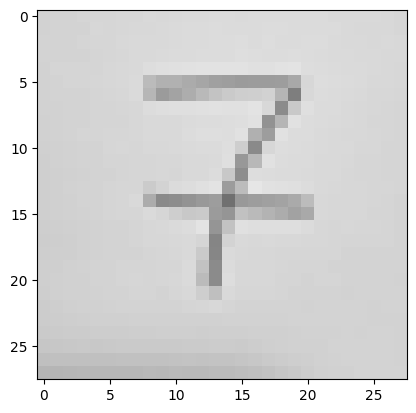

In [ ]:
outfit_prediction, image = digit_predict_from_image('7.jpg', model)

# Mostrar la predicción
print('The machine has predicted that your picture is a {0:s}.'.format(outfit_prediction))
plt.imshow(image.reshape(28,28),cmap='gray',vmin=0,vmax=1)